In [8]:
import requests
from bs4 import BeautifulSoup

planilha = []

links_episodios = ["https://www.imdb.com/title/tt8135530/?ref_=ttep_ep1",
                   "https://www.imdb.com/title/tt8806264/?ref_=ttep_ep2",
                   "https://www.imdb.com/title/tt8806262/?ref_=ttep_ep3",
                   "https://www.imdb.com/title/tt8806266/?ref_=ttep_ep4",
                   "https://www.imdb.com/title/tt8806268/?ref_=ttep_ep5",
                   "https://www.imdb.com/title/tt8806274/?ref_=ttep_ep6",
                   "https://www.imdb.com/title/tt8806270/?ref_=ttep_ep7",
                   "https://www.imdb.com/title/tt8806272/?ref_=ttep_ep8"]

for link in links_episodios: # Pega cada link da lista de links para fazer a requisição
    requisicao = requests.get(link)

    sopa = BeautifulSoup(requisicao.content, "html.parser") # Dados brutos da página inteira
    
    # Conjunto que acha o nome da série
    acha_nome = sopa.find("div", {"class": "titleParent"})
    nome_serie = acha_nome.find("a").text

    # Conjunto que acha a temporada e o número do episódio
    acha_temp_episodio = sopa.find("div", {"class": "bp_description"})
    temp_episodio = acha_temp_episodio.find("div", {"class": "bp_heading"}).text.strip() # Temporada e episódio dentro da mesma tag separados por |
    lista = temp_episodio.split(" | ") # Comando split e cria uma lista com os dois itens
    temporada = lista[0] # Primeiro item da lista corresponde à temporada
    episodio = lista[1] # Segundo item da lista corresponde ao episódio
    temporada = temporada.replace("Season ", "") # Limpa para deixar só o número
    episodio = episodio.replace("Episode", "") # Limpa para deixar só o número
    
    # Conjunto que acha o nome do episódio
    acha_nome_episodio = sopa.find("div", {"class": "title_wrapper"}) # Div com o nome do episódio
    nome_episodio = acha_nome_episodio.find("h1").text.strip() # Limpa só o nome do episódio

    # Conjunto que acha a avaliação do episódio
    avaliacao = sopa.find("div", {"class": "imdbRating"})
    nota = avaliacao.find("span", {"itemprop": "ratingValue"}).text.strip()
    votos = avaliacao.find("span", {"itemprop": "ratingCount"}).text.strip()
    votos = votos.replace(",", "") # Limpa para poder converter para inteiro
    
    dicionario = {"serie": nome_serie, "temporada": temporada, "episodio": episodio, "nome_episodio": nome_episodio, "nota": float(nota), "votos": int(votos)} # Monta o dicionário
    planilha.append(dicionario) # Adiciona planilha ao dicionário
    
print(planilha)

[{'serie': 'Euphoria', 'temporada': '1', 'episodio': ' 1', 'nome_episodio': 'Pilot', 'nota': 8.3, 'votos': 2093}, {'serie': 'Euphoria', 'temporada': '1', 'episodio': ' 2', 'nome_episodio': "Stuntin' Like My Daddy", 'nota': 8.4, 'votos': 1557}, {'serie': 'Euphoria', 'temporada': '1', 'episodio': ' 3', 'nome_episodio': 'Made You Look', 'nota': 8.7, 'votos': 1391}, {'serie': 'Euphoria', 'temporada': '1', 'episodio': ' 4', 'nome_episodio': 'Shook One: Pt II', 'nota': 9.3, 'votos': 1701}, {'serie': 'Euphoria', 'temporada': '1', 'episodio': ' 5', 'nome_episodio': "'03 Bonnie and Clyde", 'nota': 8.5, 'votos': 1097}, {'serie': 'Euphoria', 'temporada': '1', 'episodio': ' 6', 'nome_episodio': 'The Next Episode', 'nota': 8.6, 'votos': 1045}, {'serie': 'Euphoria', 'temporada': '1', 'episodio': ' 7', 'nome_episodio': 'The Trials and Tribulations of Trying to Pee While Depressed', 'nota': 9.0, 'votos': 1122}, {'serie': 'Euphoria', 'temporada': '1', 'episodio': ' 8', 'nome_episodio': 'And Salt the Ea

In [9]:
import pandas

df = pandas.DataFrame(planilha)
df.to_csv("euphoria.csv", sep = ";", encoding = "utf-8")
df.sort_values(by = "nota", ascending = False)

,episodio,nome_episodio,nota,serie,temporada,votos
3,4,Shook One: Pt II,9.3,Euphoria,1,1701
6,7,The Trials and Tribulations of Trying to Pee W...,9.0,Euphoria,1,1122
7,8,And Salt the Earth Behind You,8.9,Euphoria,1,1205
2,3,Made You Look,8.7,Euphoria,1,1391
5,6,The Next Episode,8.6,Euphoria,1,1045
4,5,'03 Bonnie and Clyde,8.5,Euphoria,1,1097
1,2,Stuntin' Like My Daddy,8.4,Euphoria,1,1557
0,1,Pilot,8.3,Euphoria,1,2093


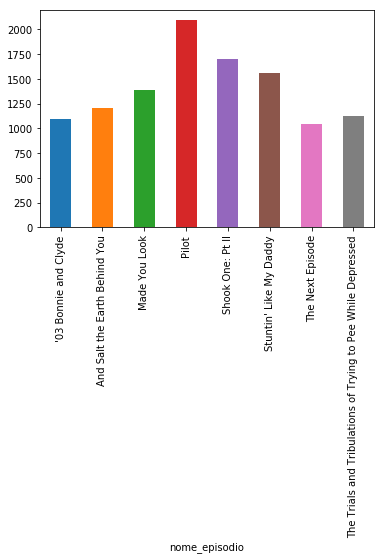

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

agrupamento1 = df.groupby("nome_episodio")["votos"].sum()
agrupamento1.plot.bar()

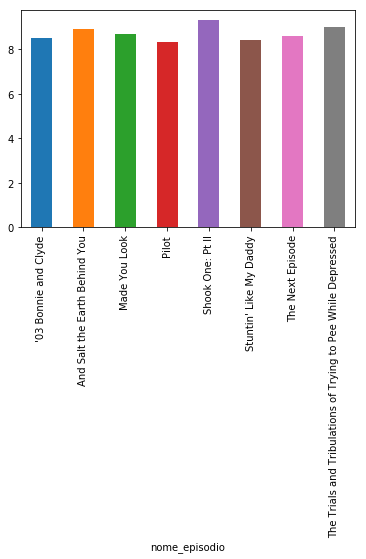

In [11]:
agrupamento2 = df.groupby("nome_episodio")["nota"].mean()
agrupamento2.plot.bar()